<h1 align="center">Credit Card Fraud Detection</h1> 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as snb
import numpy as np
import sklearn as sk

## Loading the dataset :

In [2]:
data = pd.read_csv("C:/Users/Saima R. Shaikh/Desktop/TE Comp/SDL- Chajjed ma'am/Mini Project/CreditCard_Fraud_Detection.csv")

In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Information about data set

The Dataset we use is downloaded from Kaggle website "Credit Card Fraud Detection Dataset".
The data is in good shape, that is, there is no missing.

<ul>
  <li>The Data has 32 features from V1-V28 which are known for confidentiality, Time, Amount and Class.</li>
  <li>The input features are V1-V28, Time and Amount.</li>
  <li>The target variable is Class.</li>
  <li>The Data does not have any missing values as evident from the below mentioned code, thus need not be handled.</li>
  <li>The Data consists of all numerical features, and only the Target Variable Class is a categorical feature.</li>
    <ul>
      <li>Class 0: <b>Normal Transaction</b></li>
      <li>Class 1: <b>Fraud Transaction</b></li>
    </ul>
</ul>

In [4]:
print(data.shape)

(284807, 31)


In [5]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Data Quality Check 

### Check for NULL/MISSING values :

In [9]:
# percentage of missing values in each column
round(100 * (data.isnull().sum()/len(data)),2).sort_values(ascending=False)

Class     0.0
V14       0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V15       0.0
Amount    0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Time      0.0
dtype: float64

Observation :
<ul>
<li>There are no missing / Null values either in columns or rows.</li>
    </ul>

In [10]:
fraud = data.loc[data['Class'] == 1]  
normal = data.loc[data['Class'] == 0]

In [11]:
fraud.count()

Time      492
V1        492
V2        492
V3        492
V4        492
V5        492
V6        492
V7        492
V8        492
V9        492
V10       492
V11       492
V12       492
V13       492
V14       492
V15       492
V16       492
V17       492
V18       492
V19       492
V20       492
V21       492
V22       492
V23       492
V24       492
V25       492
V26       492
V27       492
V28       492
Amount    492
Class     492
dtype: int64

In [12]:
len(fraud)

492

In [13]:
len(normal)

284315

# Exploring Data Analysis 

### Overall Data Distribution :

In [14]:
data=data.sample(frac=0.1,random_state=1)
print(data.shape)

(28481, 31)


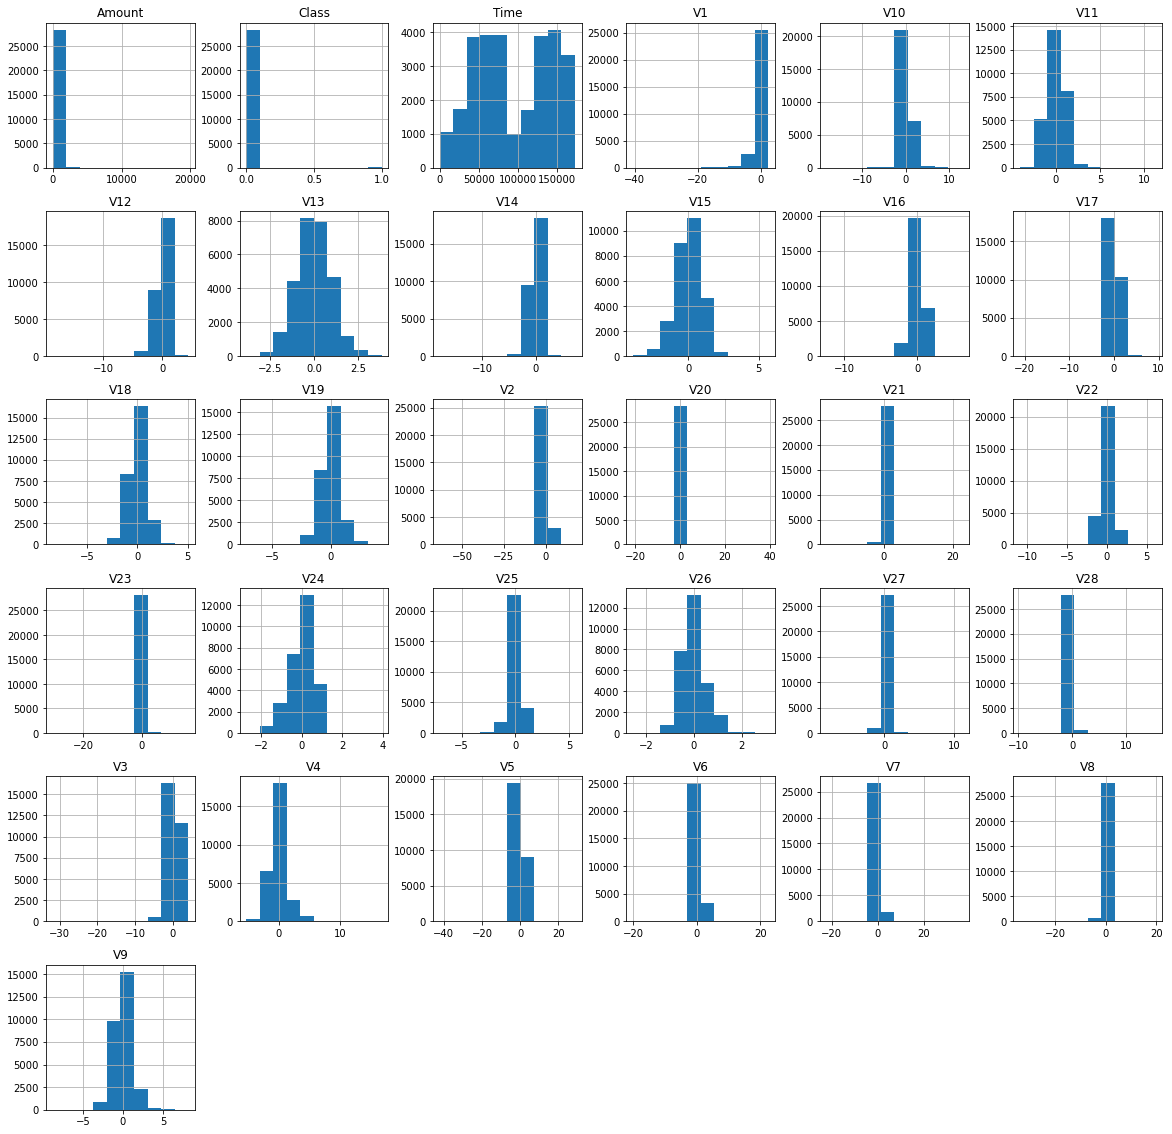

In [15]:
data.hist(figsize=(20,20))
plt.show()

### Count Plot :

492
284315


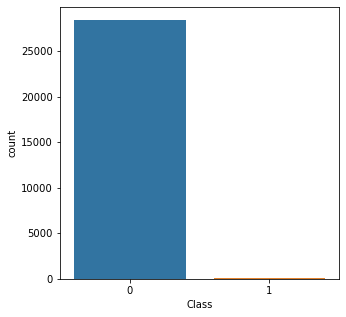

In [16]:
#fraud=data[data["Class"]==1]
#normal=data[data["Class"]==0]
plt.figure(figsize=(5,5))
print(len(fraud))
print(len(normal))
snb.countplot(x='Class', data=data)

Observations : 
<ul>
<li>The Dataset is highly imbalanced as evident from the countplot with majoritarian class label '0' and minority class label '1'.</li>
<li>Here is column of output label column which includes <b>fraudulent and normal transaction.</b></li>
    </ul>

### Scatter Plot :

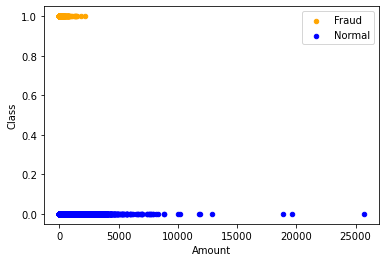

In [17]:
ax = fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
normal.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()

### Joint Plot :

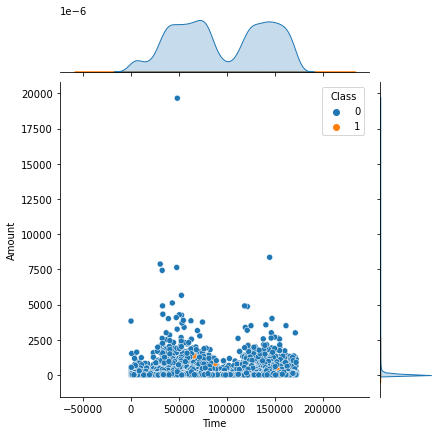

In [18]:
snb.jointplot(data=data, x="Time", y="Amount", hue='Class')

### Box Plot :

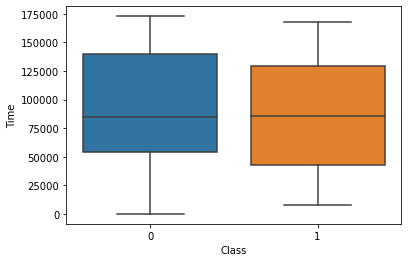

In [19]:
snb.boxplot(x = "Class", y = "Time", data = data)
plt.show()

Observations:

By looking at the above box plot we can say that both fraud & genuine transactions occur throughout time and there is no distinction between them.

## Min and Max values :

In [20]:
print(f"Maximum amount transacted during fraudulent time: {max(fraud.Amount)}")
print(f"Maximum amount transacted during normal time: {max(normal.Amount)}")

Maximum amount transacted during fraudulent time: 2125.87
Maximum amount transacted during normal time: 25691.16


In [21]:
print(f"Minimum amount transacted during fraudulent time: {min(fraud.Amount)}")
print(f"Minimum amount transacted during normal time: {min(normal.Amount)}")

Minimum amount transacted during fraudulent time: 0.0
Minimum amount transacted during normal time: 0.0


### Relationship of fraud transactions with amount of money :

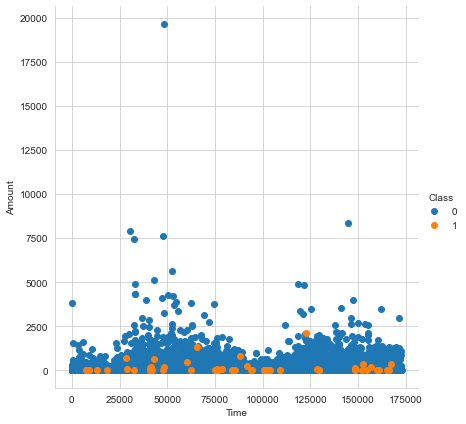

In [22]:
#pairplot_data_grid(df, "Time", "Amount", "Class")
#snb.set(style='whitegrid')
#snb.scatterplot(x="Time",y="Amount",hue="Class",data=data)
#data.Class.value_counts()

snb.set_style("whitegrid")
snb.FacetGrid(data, hue="Class",height=6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

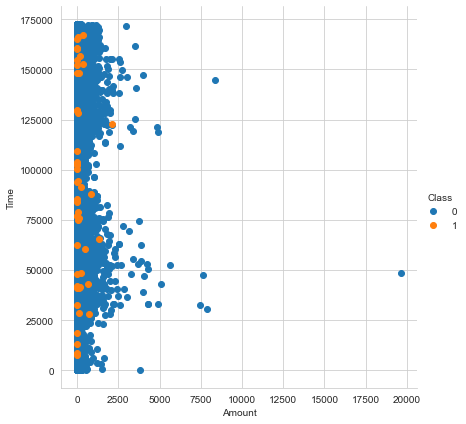

In [23]:
snb.set_style("whitegrid")
snb.FacetGrid(data, hue="Class", height = 6).map(plt.scatter, "Amount", "Time").add_legend()
plt.show()

Observations:
<ul>
<li>From the above two plots it is clearly visible that, all fraud transactions occur for an amount less than 2500.</li>
<li>Transactions which have transaction amount approximately above 2500 have no fraud.</li>
<li>With the time, frauds in the transactions are evenly distributed throughout time.</li>
    </ul>

### Relationship between Time and Transactions :

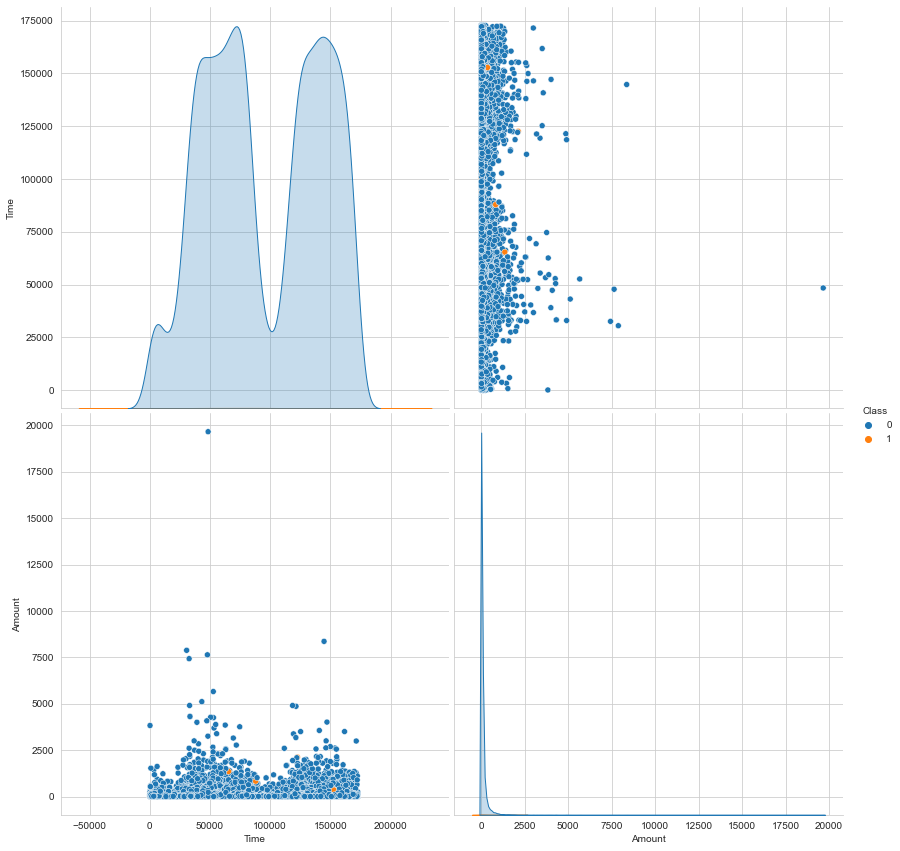

In [24]:
data_refine = data[["Time", "Amount", "Class"]]
snb.pairplot(data_refine, hue="Class", height=6)
plt.show()

C:\Users\Saima R. Shaikh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Saima R. Shaikh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


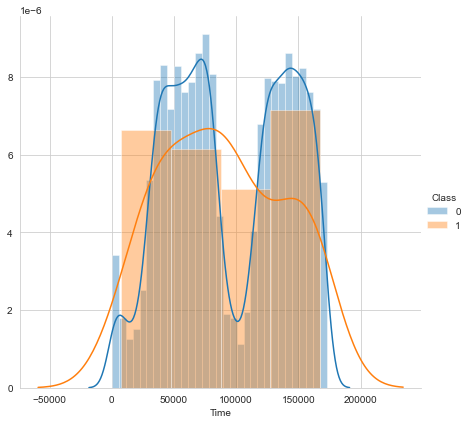

In [25]:
snb.FacetGrid(data_refine, hue="Class", height=6).map(snb.distplot,"Time").add_legend()
plt.show()
#snb.displot(data['data_refine']);

Observations:
<ul>
<li>There is a heavy overlap of genuine and fraud transactions throughout the time and there is <b>no clear distinction.</b></li>
<li>From the above distribution plot, it is clear that the <b>fraudulent transactions are spread throughout the time period.</b></li>
    </ul>

C:\Users\Saima R. Shaikh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Saima R. Shaikh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


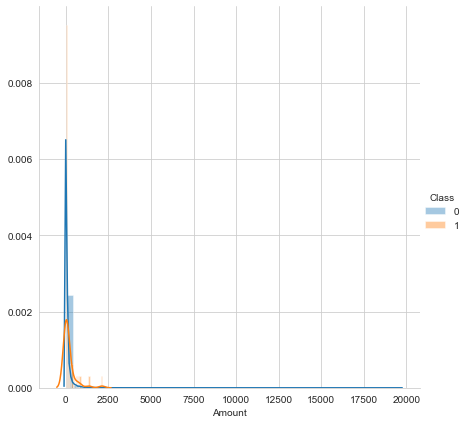

In [26]:
snb.FacetGrid(data_refine, hue="Class", height=6).map(snb.distplot, "Amount").add_legend()
plt.show()

Observations:

Most of the transaction have amount less than 2500 approximately and all of the fraud transactions have transaction amount less than 2500. There is no fraud transaction of transaction amount greater than 2500.

### Correlation Matrix :

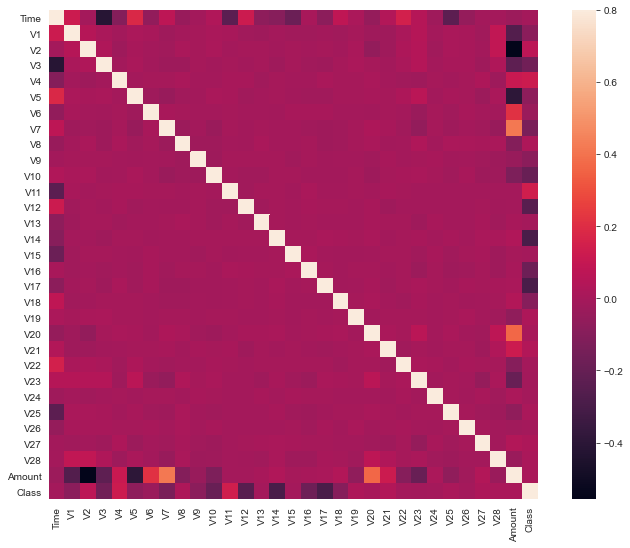

In [27]:
corrmatrix = data.corr()
fig = plt.figure(figsize = (12, 9))

snb.heatmap(corrmatrix, vmax = .8, square = True)
plt.show()

## Mean, Median and Std-dev :

In [28]:
#Mean :
print("Mean of transaction amount of normal transactions: ",np.mean(normal["Amount"]))
print("Mean of transaction amount of fraud transactions: ",np.mean(fraud["Amount"]))

Mean of transaction amount of normal transactions:  88.29102242225574
Mean of transaction amount of fraud transactions:  122.21132113821133


In [29]:
#Standard Deviation :
print("Std-Deviation of transaction amount of genuine transactions: ", np.std(normal["Amount"]))
print("Std-Deviation of transaction amount of fraud transactions: ", np.std(fraud["Amount"]))

Std-Deviation of transaction amount of genuine transactions:  250.1046523874637
Std-Deviation of transaction amount of fraud transactions:  256.42229861324483


In [30]:
#Median :
print("Median of transaction amount of genuine transactions: ", np.median(normal["Amount"]))
print("Median of transaction amount of fraud transactions: ", np.median(fraud["Amount"]))

Median of transaction amount of genuine transactions:  22.0
Median of transaction amount of fraud transactions:  9.25


## Logistic Regression : 

### Set target attribute & Split data into traing and test

In [31]:
# take two varibale Fraud and normal
fraud = data.loc[data['Class'] == 1]  
normal = data.loc[data['Class'] == 0]
#len(fraud)
#print('fraud: ')
#print('normal: ')
#len(normal)
#data = pd.read_csv("C:/Users/Saima R. Shaikh/Desktop/TE Comp/SDL- Chajjed ma'am/Mini Project/CreditCard_Fraud_Detection.csv")
#data
print(len(fraud))
print(len(normal))

49
28432


In [32]:
# convert data in form of x and y
x = data.iloc[:,:-1]
y = data["Class"]

In [33]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [35]:
#use logistic Regression
classifier = linear_model.LogisticRegression(C=1e5)

In [36]:
#fit the model
classifier.fit(x_train,y_train)

C:\Users\Saima R. Shaikh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100000.0)

In [37]:
#use predict method
y_predict = np.array(classifier.predict(x_test))
y = np.array(y_test)

In [38]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [39]:
#check accuracy 
print("accuracy: ",accuracy_score(y_test,y_predict))

accuracy:  0.9981275599765945


In [40]:
#confusion matrix
print(confusion_matrix(y_test,y_predict))

[[8520   11]
 [   5    9]]


In [41]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8531
           1       0.45      0.64      0.53        14

    accuracy                           1.00      8545
   macro avg       0.72      0.82      0.76      8545
weighted avg       1.00      1.00      1.00      8545



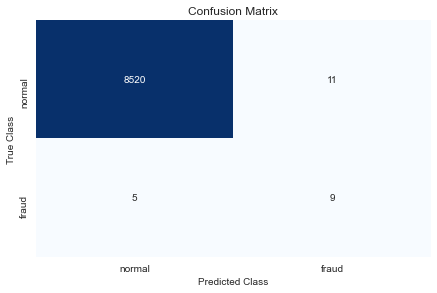

In [52]:
class_names = ['normal', 'fraud']
lr_matrix = confusion_matrix(y_test, y_predict)
data = pd.DataFrame(lr_matrix, index=class_names, columns=class_names)
# Create heatmap
snb.heatmap(data, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

## Decision Tree :

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [47]:
y_predict_decision_tree = classifier.predict(x_test)

In [48]:
print("y_prediction_decision_tree : \n", y_predict_decision_tree)

y_prediction_decision_tree : 
 [0 0 0 ... 0 0 0]


In [49]:
cm_decision = confusion_matrix(y_test, y_predict_decision_tree)
print("confusion Marix : \n", cm_decision)

confusion Marix : 
 [[8526    5]
 [   7    7]]


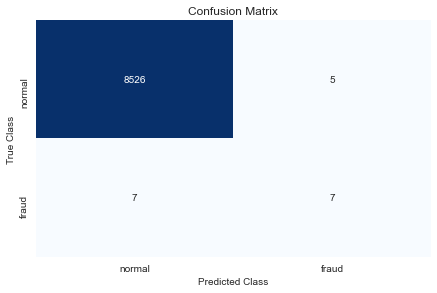

In [50]:
class_names = ['normal', 'fraud']
cm_decision = confusion_matrix(y_test, y_predict_decision_tree)
# Create pandas dataframe
data = pd.DataFrame(cm_decision , index=class_names, columns=class_names)
# Create heatmap
snb.heatmap(data, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()